In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
from google.colab import drive
from IPython.display import set_matplotlib_formats

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium


plt.rc('font',family='NanumBarunGothic')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv')
df = df.copy()
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",150030,7250,NaN,1,NaN,126.907168,37.520613


#데이터 구성 살펴보기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

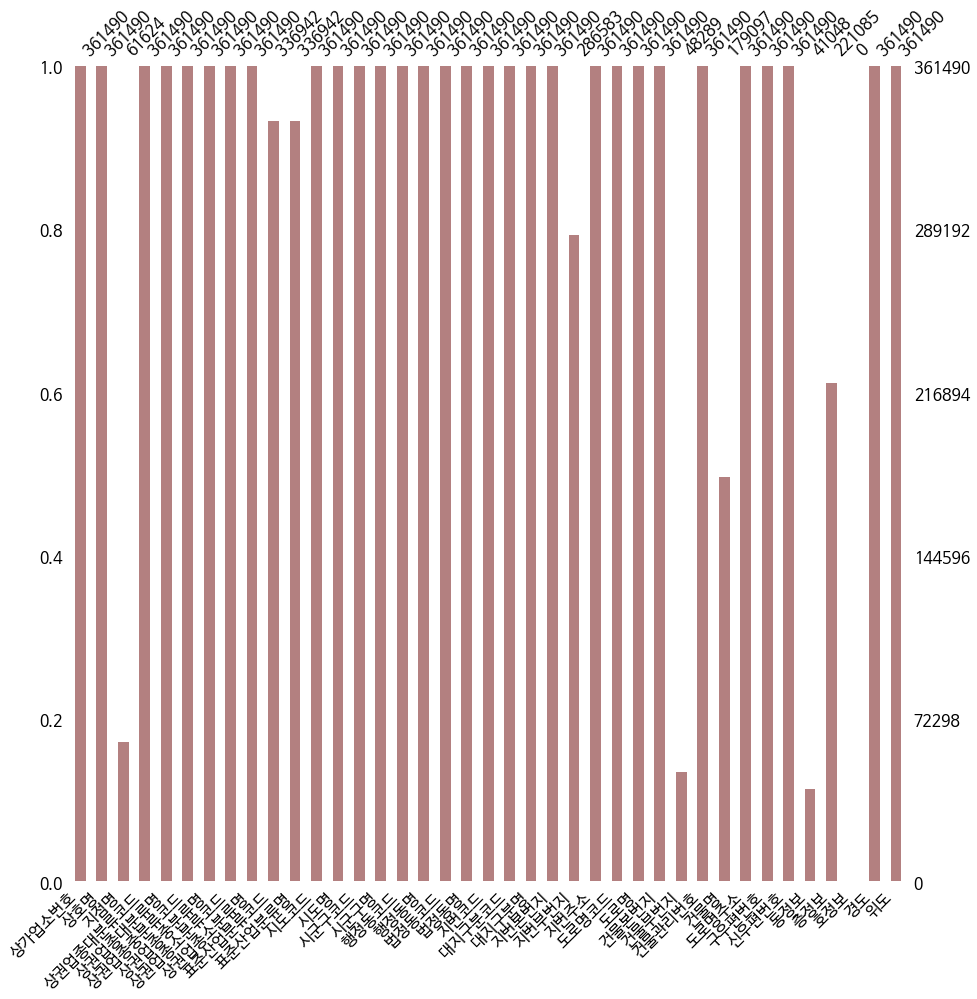

In [ ]:
# 결측치
msno.bar(df=df.iloc[:,:],figsize = (15,15),color = (0.7,0.5,0.5))

* 지점명, 건물부번지, 동정보, 호정보 에는 결측치가 많다.

In [ ]:
df["상권업종대분류명"].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

* 상권업종에 크게 8가지 종류로 나뉘어 지는데 관심이 가는 순서대로(스포츠 -> 관광/여가/오락 -> 음식 -> ... ) 데이터 분석을 해볼 것이다. 

In [ ]:
df["상권업종중분류명"].unique()

array(['건강/미용식품', '취미/오락관련소매', '시계/귀금속소매', '학원-보습교습입시', '한식', '유흥주점',
       '학원-창업취업취미', '자동차/자동차용품', '부동산중개', '사진/광학/정밀기기소매', '도서관/독서실',
       '커피점/카페', '대중목욕탕/휴게', '주유소/충전소', '패스트푸드', '닭/오리요리', '자동차/이륜차',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '중식', 'PC/오락/당구/볼링등',
       '음/식료품소매', '종합소매점', '세탁/가사서비스', '기타서비스업', '의복의류', '가방/신발/액세서리',
       '양식', '제과제빵떡케익', '무도/유흥/가무', '가정/주방/인테리어', '운동/경기용품소매', '개인서비스',
       '학원-예능취미체육', '학원기타', '가전제품소매', '유아교육', '물품기기대여', '학문교육기타', '기타판매업',
       '사진', '분식', '화장품소매', '애견/애완/동물', '대행업', '철물/난방/건설자재소매',
       '학원-음악미술무용', '별식/퓨전요리', '주택수리', '연극/영화/극장', '모텔/여관/여인숙', '호텔/콘도',
       '실내운동시설', '의약/의료품소매', '실외운동시설', '학원-어학', '기타음식업', '광고/인쇄',
       '예식/의례/관혼상제', '책/서적/도서', '가구소매', '요가/단전/마사지', '운송/배달/택배', '일식/수산물',
       '개인/가정용품수리', '인력/고용/용역알선', '평가/개발/관리', '법무세무회계', '운영관리시설', '부페',
       '중고품소매/교환', '장례/묘지', '분양', '예술품/골동품/수석/분재', '유아용품', '페인트/유리제품소매',
       '행사/이벤트', '스포츠/운동', '음식배달서비스', '놀이/여가/취미', '종교용품판매', '민박/하숙',
       '경마/경륜/성인

In [ ]:
df["상권업종소분류명"].unique()

array(['건강원', '악기판매', '시계/귀금속', '학원-입시', '한식/백반/한정식', '민속주점', '학원-디자인',
       '타이어판매', '부동산중개', '카메라판매', '족발/보쌈전문', '곱창/양구이전문', '독서실',
       '커피전문점/카페/다방', '욕탕업-종합', '주유소', '토스트전문', '삼계탕전문', '자동차정비/카센타',
       '핸드폰소매', '꽃집/꽃배달', '비만/피부관리', '사무용기기소매', '중국음식/중국집', '세차장', '기원',
       '얼음가게', '편의점', '세탁소/빨래방', '패션디자인', '아동복판매', '수퍼마켓', '컴퓨터/사무용기기종합',
       '청소/소독', '가방/가죽제품소매', '섬유/직물/주단', '정육점', '종합소매', '패밀리레스토랑', '제과점',
       '양품점', '노래방', '지물판매', '일반의류', '인테리어/욕실용품/커튼', '백화점', '사무/문구용품',
       '운동/경기용품', '번역/통역서비스', '레크레이션지도/상담', '컴퓨터/주변기기', '학원(종합)',
       '일반가전제품', '인터넷PC방', '어린이집', '떡전문', '여성미용실', '렌트카', '운동/코치학교',
       '통신판매', '사진관', '부대찌개/섞어찌개', '주방가구판매', '국수/만두/칼국수', '사업경영상담',
       '화장품판매점', '청과물소매', '안경원', '애견/애완/동물사육판매', '등산용품판매', '이민유학알선',
       '셔터/새시판매', '피아노/바이올린/기타', '죽전문점', '호프/맥주', '빠/카페/스탠드빠',
       '캐쥬얼/스포츠의류', '주택수리종합', '도시락전문점', '해장국/감자탕', '연극/음악/예술관련기타',
       '두부요리전문', '모텔/여관/여인숙', '호텔/콘도', '건강식품판매', '실내골프연습장', '육류소매',
       '보청기판매', '골프장', '침구/수예품',

In [ ]:
df.describe(include="object")

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보
count,361490,61624,361490,361490,361490,361490,361490,361490,336942,336942,...,361490,361490,361490,361490,361490,361490,179097,361490,41048,221085
unique,263524,21694,8,8,89,89,677,677,202,202,...,425,463,2,134165,12408,133134,30377,133359,1169,139
top,CU,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,1111016400102700003012054,동대문종합시장,"서울특별시 종로구 종로 266, (종로6가)",1,1
freq,1702,465,121534,121534,39624,39624,29155,29155,46481,46481,...,6628,8292,361232,892,2263,898,1047,898,5139,137524


In [ ]:
df["상권업종대분류명"].value_counts()

음식          121534
소매          103889
생활서비스        74450
학문/교육        26193
부동산          18600
관광/여가/오락      9167
스포츠           5290
숙박            2367
Name: 상권업종대분류명, dtype: int64

#스포츠업종 분석

In [ ]:
df_sports = df[df["상권업종대분류명"] == "스포츠"]
df_sports

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
151,24036986,굿샷스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1147010200104060004020911,현대프라자,"서울특별시 양천구 오목로 279, (목동)",158806,7993,NaN,1,NaN,126.868376,37.525915
159,21680707,더존골프아카데미,NaN,P,스포츠,P03,실외운동시설,P03A09,골프장,R91121,...,1165010600100530000018918,잠원현대아파트,"서울특별시 서초구 잠원로12길 4, (잠원동, 잠원현대아파트)",137907,6517,NaN,-1,NaN,127.012702,37.518127
226,24964476,CC커뮤니케이션,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1121510400102480022010562,NaN,"서울특별시 광진구 아차산로73길 48, (광장동)",143805,4968,NaN,NaN,NaN,127.102417,37.546722
251,28523229,바디스토리짐,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1132010600106870046018856,NaN,"서울특별시 도봉구 도봉로145길 51, (방학동)",132850,1345,NaN,NaN,NaN,127.039669,37.664516
350,28516129,드림스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1130510200101230001035797,양주조씨회관,"서울특별시 강북구 오현로 131, (번동)",142062,1151,NaN,1,NaN,127.037312,37.624131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360864,18847577,엔리치필라테스,잠실점,P,스포츠,P02,실내운동시설,P02A25,스쿼시장,R91139,...,1171010100101910001000696,NaN,"서울특별시 송파구 올림픽로10길 13-1, (잠실동)",138862,5560,NaN,4,NaN,127.081317,37.510301
360977,18754894,쿠타짐동대문,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1123010500104830039018841,NaN,"서울특별시 동대문구 황물로 103, (답십리동)",130805,2602,NaN,B1,NaN,127.051496,37.569616
361009,18747737,몸을짓다,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1147010200109340000020963,목동금호1차아파트,"서울특별시 양천구 목동동로 258, (목동, 금호1차)",158821,7999,상가,NaN,NaN,126.875128,37.525331
361314,18770851,미나모토골프스튜디오,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1168011800104650000000703,우성4차아파트,"서울특별시 강남구 언주로 117, (도곡동, 개포우성4차)",135505,6299,상가,2,NaN,127.050377,37.486449


* 스포츠분야는 총 361490개 중에서 5290개를 차지하고 있다.

## 실내운동시설과 실외운동시설이 많은 지역 알아보기

In [ ]:
# 스포츠분야에 중분류
df_sports["상권업종중분류명"].value_counts()

실내운동시설    4671
운영관리시설     427
실외운동시설     192
Name: 상권업종중분류명, dtype: int64

In [ ]:
# 실내운동시설 데이터

df_sports_in = df_sports[df_sports["상권업종중분류명"] == "실내운동시설"]
df_sports_in.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
151,24036986,굿샷스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1147010200104060004020911,현대프라자,"서울특별시 양천구 오목로 279, (목동)",158806,7993,NaN,1,NaN,126.868376,37.525915
226,24964476,CC커뮤니케이션,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1121510400102480022010562,NaN,"서울특별시 광진구 아차산로73길 48, (광장동)",143805,4968,NaN,NaN,NaN,127.102417,37.546722
251,28523229,바디스토리짐,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,1132010600106870046018856,NaN,"서울특별시 도봉구 도봉로145길 51, (방학동)",132850,1345,NaN,NaN,NaN,127.039669,37.664516
350,28516129,드림스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1130510200101230001035797,양주조씨회관,"서울특별시 강북구 오현로 131, (번동)",142062,1151,NaN,1,NaN,127.037312,37.624131
400,25246857,한성탁구장,NaN,P,스포츠,P02,실내운동시설,P02A99,기타실내운동시설,R91139,...,1154510300108370038003079,하나은행시흥중앙점,"서울특별시 금천구 독산로 56, (시흥동)",153841,8573,NaN,3,NaN,126.906217,37.452368


In [ ]:
# 실외운동시설 데이터

df_sports_out = df_sports[df_sports["상권업종중분류명"] == "실외운동시설"]
df_sports_out.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
159,21680707,더존골프아카데미,NaN,P,스포츠,P03,실외운동시설,P03A09,골프장,R91121,...,1165010600100530000018918,잠원현대아파트,"서울특별시 서초구 잠원로12길 4, (잠원동, 잠원현대아파트)",137907,6517,NaN,-1,NaN,127.012702,37.518127
627,24050840,위너스파크,NaN,P,스포츠,P03,실외운동시설,P03A09,골프장,R91121,...,1120011800100660267003441,NaN,"서울특별시 성동구 광나루로 313, (송정동)",133836,4801,NaN,NaN,NaN,127.064497,37.548328
3374,22045590,목동운동장,NaN,P,스포츠,P03,실외운동시설,P03A99,기타실외운동시설,R91139,...,1147010200109140000020798,목동아이스링크,"서울특별시 양천구 안양천로 939, (목동)",158051,7990,NaN,1,NaN,126.879222,37.530722
3451,24965018,비앤에치스위너스스크,NaN,P,스포츠,P03,실외운동시설,P03A09,골프장,R91121,...,1153010100104000001026485,NaN,"서울특별시 구로구 신도림로 7, (신도림동)",152887,8206,NaN,NaN,NaN,126.877146,37.506149
4186,28511024,구로5동게이트볼장,NaN,P,스포츠,P03,실외운동시설,P03A16,게이트볼장,R91139,...,1153010200100500009019238,구로실내게이트볼장,"서울특별시 구로구 새말로18길 17, (구로동)",152838,8289,NaN,NaN,NaN,126.892884,37.505766


In [ ]:
in_n = df_sports_in["시군구명"].value_counts()
in_n

강남구     615
서초구     359
송파구     355
강서구     286
강동구     219
영등포구    210
노원구     193
관악구     186
광진구     184
마포구     180
양천구     173
구로구     153
동대문구    146
성동구     145
은평구     143
성북구     136
동작구     121
도봉구     121
중구      121
금천구     119
중랑구     116
서대문구    112
용산구      99
강북구      99
종로구      80
Name: 시군구명, dtype: int64

In [ ]:
out_n = df_sports_out["시군구명"].value_counts()
out_n

강남구     26
서초구     16
송파구     14
영등포구    14
관악구     10
광진구     10
성동구      9
중구       9
마포구      9
양천구      9
강동구      7
구로구      7
용산구      7
서대문구     7
노원구      6
강서구      6
동대문구     5
강북구      4
중랑구      4
종로구      4
성북구      3
동작구      3
은평구      2
도봉구      1
Name: 시군구명, dtype: int64

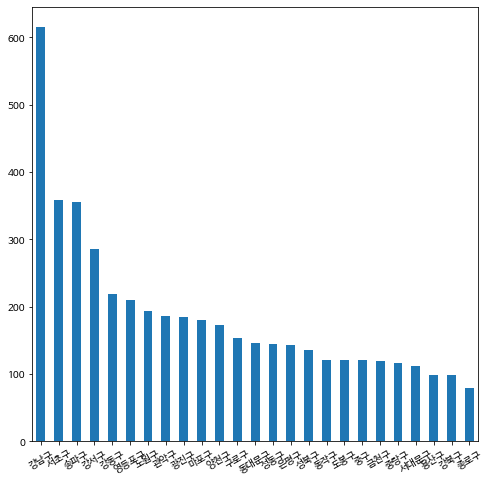

In [ ]:
# 실내운동시설 시군구별 갯수 시각화

in_n.plot.bar(rot=30,figsize = (8,8))

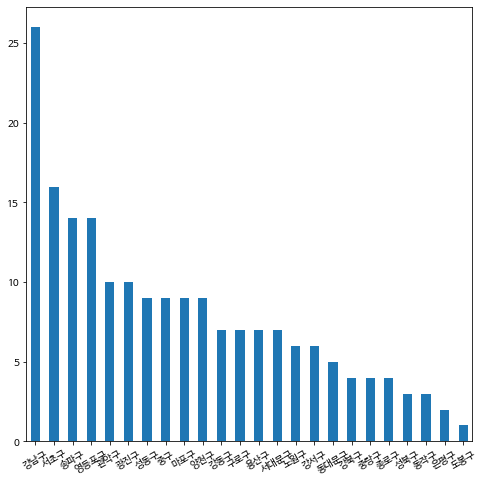

In [ ]:
# 실외운동시설 시군구별 갯수 시각화

out_n.plot.bar(rot=30,figsize = (8,8))

* 실내는 강남구 > 서초구 > 송파구 > 강서구 > 강동구 순서이다.
* 실외는 강남구 > 서초구 > 송파구 > 영등포구 > 관악구 순서이다.

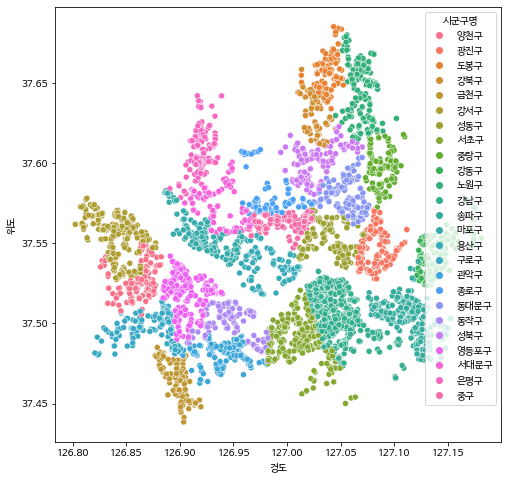

In [ ]:
# 경도,위로를 이용하여 실내 이용시설 표시

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_sports_in, x= "경도", y = "위도", hue="시군구명")

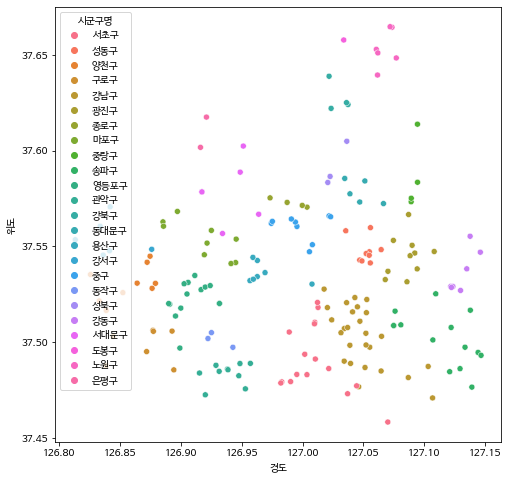

In [ ]:
# 경도,위로를 이용하여 실외 이용시설 표시

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_sports_out, x= "경도", y = "위도", hue="시군구명")

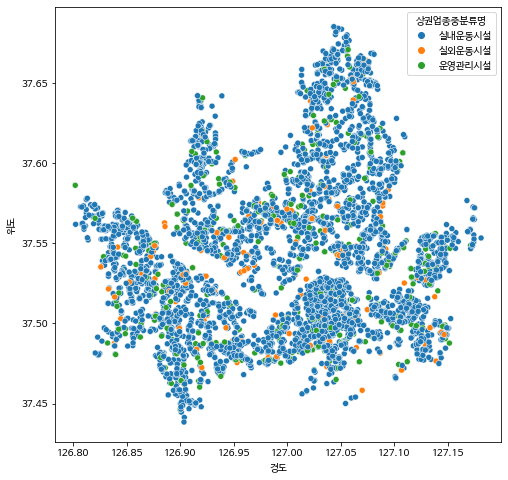

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_sports, x= "경도", y = "위도", hue="상권업종중분류명")

In [ ]:
l = df_sports["위도"].mean()
m = df_sports["경도"].mean()

print(l)
print(m)

37.54034028404787
126.99906074356134


In [ ]:
# map = folium.Map(location = [l,m],zoom_start = 13)

# for n in df_sports_in.index:
#   location = [df_sports_in.loc[n,"위도"],df_sports_in.loc[n,"경도"]]
#   folium.Marker(
#       location = location,
#       popup = "실내운동시설",
#       icon=folium.Icon(color = "red"),
#   ).add_to(map)

# for n in df_sports_out.index:
#     location = [df_sports_out.loc[n,"위도"],df_sports_out.loc[n,"경도"]]
#     folium.Marker(
#       location = location,
#       popup = "실외운동시설",
#       scrollWheelZoom=False,
#       icon=folium.Icon(color = "blue"),
#   ).add_to(map)


# map

In [ ]:
# map.save('index.html')

##실내, 실외 운동시설에는 무었이 있을까?

In [ ]:
sports_in = df_sports_in["상권업종소분류명"].value_counts().index
print(sports_in)

sports_out = df_sports_out["상권업종소분류명"].value_counts().index
print(sports_out)

Index(['헬스클럽', '실내골프연습장', '체육관', '기타실내운동시설', '스포츠센터', '복싱도장', '실내테니스장',
       '실내수영장', '킥복싱', '이종격투기', '스쿼시장', '택견도장', '쿵후도장', '석궁장'],
      dtype='object')
Index(['골프장', '테니스장', '기타실외운동시설', '수영장', '풋살경기장', '실외골프연습장', '인공암벽', '스킨스쿠버강습',
       '스키장', '수상스키', '축구장', '눈썰매장', '게이트볼장', '승마장', '래프팅'],
      dtype='object')


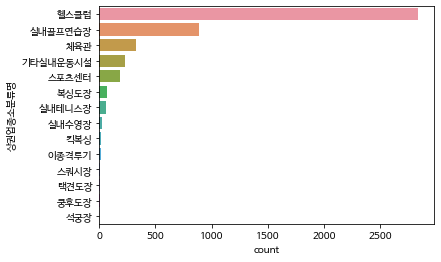

In [ ]:
sns.countplot(data = df_sports_in, y = "상권업종소분류명", order = sports_in)

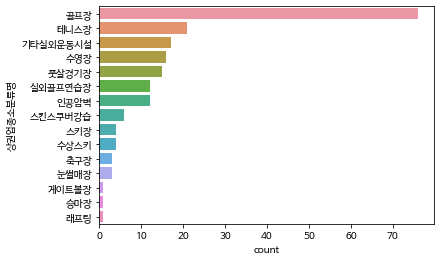

In [ ]:
sns.countplot(data = df_sports_out, y = "상권업종소분류명", order = sports_out)

* 서울에 있는 운동시설 중에서 골프를 할 수 있는 곳이 실내외를 모두 포함하여 많은 것 같다.
* 실내 - 실내골프연습장 : 892개
* 실외 - 골프장 : 76개, 실외골프연습장 : 12개
* 총 980개

### 골프관련 상호 데이터 분석 - 산에 가까운 지역에 골프장이 많을까??


In [ ]:
df_golf = df_sports[df_sports["상권업종소분류명"].str.contains("골프")]
df_golf

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
151,24036986,굿샷스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1147010200104060004020911,현대프라자,"서울특별시 양천구 오목로 279, (목동)",158806,7993,NaN,1,NaN,126.868376,37.525915
159,21680707,더존골프아카데미,NaN,P,스포츠,P03,실외운동시설,P03A09,골프장,R91121,...,1165010600100530000018918,잠원현대아파트,"서울특별시 서초구 잠원로12길 4, (잠원동, 잠원현대아파트)",137907,6517,NaN,-1,NaN,127.012702,37.518127
350,28516129,드림스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1130510200101230001035797,양주조씨회관,"서울특별시 강북구 오현로 131, (번동)",142062,1151,NaN,1,NaN,127.037312,37.624131
627,24050840,위너스파크,NaN,P,스포츠,P03,실외운동시설,P03A09,골프장,R91121,...,1120011800100660267003441,NaN,"서울특별시 성동구 광나루로 313, (송정동)",133836,4801,NaN,NaN,NaN,127.064497,37.548328
1168,22846367,원일스크린골프,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1174010600104360004000346,NaN,"서울특별시 강동구 양재대로 1422, (둔촌동)",134822,5362,NaN,2,NaN,127.138712,37.532764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358618,18834263,장안동카카오스크린,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1123010600101460020016752,NaN,"서울특별시 동대문구 한천로 126, (장안동)",130837,2623,NaN,3,NaN,127.066293,37.572230
359328,18867250,올림픽골프연습장,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1171010100101970007000904,SMS,"서울특별시 송파구 백제고분로9길 6, (잠실동)",138862,5562,A,2,NaN,127.079705,37.508946
360077,18867427,메인골프스크린,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1153010700104030086007666,NaN,"서울특별시 구로구 개봉로 25, (개봉동, 메인팰리스)",152816,8352,NaN,1,NaN,126.856003,37.487898
360621,18846091,에스제이골프아카데미,NaN,P,스포츠,P02,실내운동시설,P02A10,실내골프연습장,R91136,...,1150010100102400021028397,우림블루나인비즈니스센터,"서울특별시 강서구 양천로 583, (염창동)",157779,7547,NaN,1,NaN,126.864328,37.557106


In [ ]:
df_golf[df_golf["상권업종중분류명"].str.contains("운영관리시설")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
76432,21972958,렉스골프클럽,NaN,P,스포츠,P01,운영관리시설,P01A10,프로골프,R91191,...,1141011800200110275009186,홍은동골프연습장,"서울특별시 서대문구 연희로41길 26, (홍은동)",120845,3648,NaN,NaN,NaN,126.935905,37.59039


* 상권업종중분류명이 운영관리시설인 골프관련 상호가 있는데 검색결과 실내골프연습장이다. 

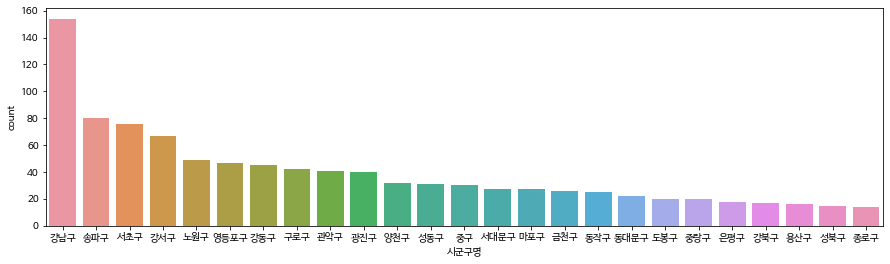

In [ ]:
# 시군구별 골프장의 수 시각화

# 시군구별 수
golf_n = df_golf["시군구명"].value_counts()
# print(golf_n)


# 시각화
plt.figure(figsize=(15,4))
sns.countplot(data=df_golf, x ="시군구명",order = golf_n.index)

* 강남 > 송파 > 서초 > 강서 >노원 > 영등포 > 강동 순으로 골프장의 수가 많다.

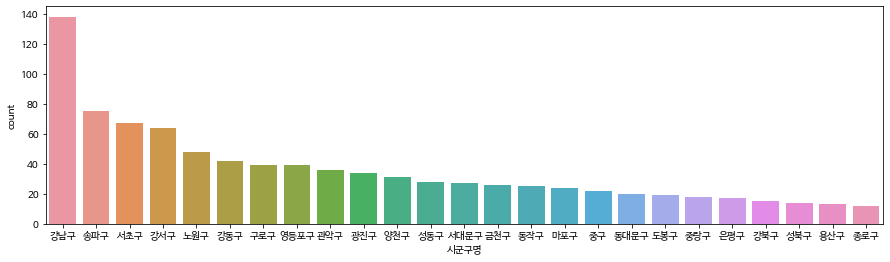

In [ ]:
# 시군구별 실내골프장의 수 시각화 (운영시설 포함)

# 실내 골프장 데이터 
df_golf_in = df_golf[(df_golf["상권업종중분류명"] == "실내운동시설") | (df_golf["상권업종중분류명"] == "운영관리시설")]

# 시군구별 수
golf_in_n = df_golf_in["시군구명"].value_counts()
# print(golf_in_n)


# 시각화
plt.figure(figsize=(15,4))
sns.countplot(data=df_golf_in, x ="시군구명",order = golf_in_n.index)


* 실내골프장의 경우 전체적인 골프장의 수 분포와 비슷하지만 강동, 구로, 영등포 등 다르게 나타나는 구가 있다.

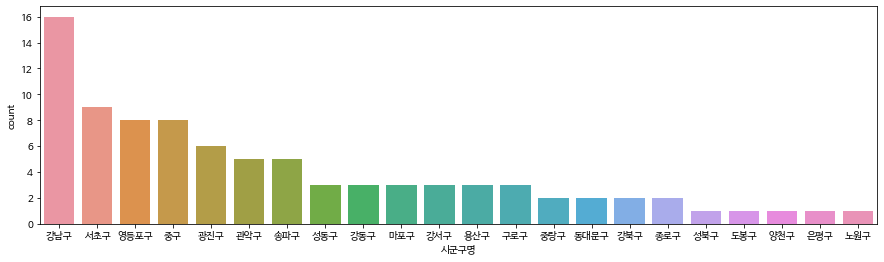

In [ ]:
# 시군구별 실외골프장의 수 시각화

# 실외 골프장 데이터 
df_golf_out = df_golf[df_golf["상권업종중분류명"] == "실외운동시설"]

# 시군구별 수
golf_out_n = df_golf_out["시군구명"].value_counts()
# print(golf_out_n)


# 시각화
plt.figure(figsize=(15,4))
sns.countplot(data=df_golf_out, x ="시군구명",order = golf_out_n.index)

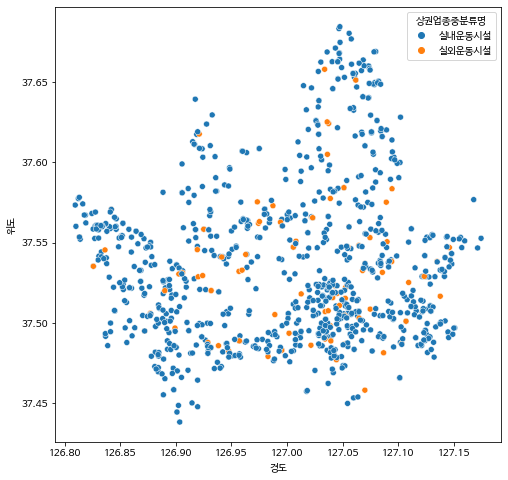

In [ ]:
# 실내/실외 골프장을 구분후 지도를 시각화하여 어디에 위치하고 있는지 찾아보기

df_golf = df_golf.copy()

# 운영관리시설이었던 데이터의 index = 76432
df_golf.loc[76432, "상권업종중분류명"] = "실내운동시설"  # 운영관리시설이었던 데이터를 실내운동시설로 변경


plt.figure(figsize=(8,8))
sns.scatterplot(data=df_golf, x= "경도", y = "위도", hue="상권업종중분류명")

* 산이 많은 지역 근처에 골프장이 많을 것이라고 생각했는데 강북보다는 강남쪽에 골프장이 많이 분포해 있었고 특히 강남구에 많이 분포해 있다.

In [ ]:
# folium 활용

l = df_golf["위도"].mean()
m = df_golf["경도"].mean()
# print(l,m)



37.536587546537255 127.00044534844743


In [ ]:
golf_map = folium.Map(location = [l,m],zoom_start = 12, scrollWheelZoom=False)

# for n in df_golf_in.index:
#   location = [df_golf_in.loc[n,"위도"],df_golf_in.loc[n,"경도"]]
#   folium.Marker(
#       location = location,
#       popup = "실내 골프 시설",
#       scrollWheelZoom=False,
#       icon=folium.Icon(color = "red", icon = "flag"),
#   ).add_to(golf_map)

for n in df_golf_out.index:
    location = [df_golf_out.loc[n,"위도"],df_golf_out.loc[n,"경도"]]
    name = df_golf_out.loc[n,"상호명"]
    address = df_golf_out.loc[n,"도로명주소"]
    popup = f"{name}-{address}"
    folium.Marker(
      location = location,
      popup = popup,
      icon=folium.Icon(color = "blue", icon = "flag")
  ).add_to(golf_map)

golf_map

* 실내 골프장 수는 너무 많기 때문에 우선 실외 골프장만 지도에 시각화 해보았다.
* 실외 골프장으로 분석을 해보았지만 검색결과 실외 골프장인 시설이 별로 없는 것 같다.

In [ ]:
golf_map.save('golf_out.html')